In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
shot0_results = pd.read_csv("Llama-3.2-3B-Instruct_MATH_0_shot_test_results.csv")
shot0_geval = pd.read_csv("Llama-3.2-3B-Instruct_MATH_0_shot_test_geval.csv")
reasn_results = pd.read_csv("Llama-3.2-3B-Instruct_MATH_reasoning_test_results.csv")
reasn_geval = pd.read_csv("Llama-3.2-3B-Instruct_MATH_reasoning_test_geval.csv")
cot_reasn_results = pd.read_csv("Llama-3.2-3B-Instruct_MATH_cot_reasoning_test_results.csv")
cot_reasn_geval = pd.read_csv("Llama-3.2-3B-Instruct_MATH_cot_reasoning_test_geval.csv")
cod_reasn_results = pd.read_csv("Llama-3.2-3B-Instruct_MATH_cod_reasoning_test_results.csv")
cod_reasn_geval = pd.read_csv("Llama-3.2-3B-Instruct_MATH_cod_reasoning_test_geval.csv")

In [3]:
shot0_geval = shot0_geval.rename(
    columns={
        "geval_correctness": "g-eval\ncorrectness",
        "geval_logical": "g-eval\nlogical\ncoherence",
    }
)
shot0_results = shot0_results.rename(columns={"correct": "correctness"})
reasn_geval = reasn_geval.rename(
    columns={
        "geval_correctness": "g-eval\ncorrectness",
        "geval_logical": "g-eval\nlogical\ncoherence",
    }
)
reasn_results = reasn_results.rename(columns={"correct": "correctness"})
cot_reasn_geval = cot_reasn_geval.rename(
    columns={
        "geval_correctness": "g-eval\ncorrectness",
        "geval_logical": "g-eval\nlogical\ncoherence",
    }
)
cot_reasn_results = cot_reasn_results.rename(columns={"correct": "correctness"})
cod_reasn_geval = cod_reasn_geval.rename(
    columns={
        "geval_correctness": "g-eval\ncorrectness",
        "geval_logical": "g-eval\nlogical\ncoherence",
    }
)
cod_reasn_results = cod_reasn_results.rename(columns={"correct": "correctness"})

In [4]:
results = {
    "Technique": [],
    "Metric": [],
    "Score": [],
}

In [5]:
shot0_results = shot0_results.merge(shot0_geval, how="left", on=["dataset_id", "question_id"])
metrics = ["bleu", "rouge1", "rouge2", "rougeL", "meteor", "chrf", "correctness", "g-eval\ncorrectness", "g-eval\nlogical\ncoherence"]
for metric, score in zip(metrics, shot0_results[metrics].mean().values.tolist()):
    results["Technique"].append("Baseline")
    results["Metric"].append(metric)
    if metric == "chrf":
        results["Score"].append(score / 100)
    else:
        results["Score"].append(score)

In [6]:
reasn_results = reasn_results.merge(reasn_geval, how="left", on=["dataset_id", "question_id"])
metrics = ["bleu", "rouge1", "rouge2", "rougeL", "meteor", "chrf", "correctness", "g-eval\ncorrectness", "g-eval\nlogical\ncoherence"]
for metric, score in zip(metrics, reasn_results[metrics].mean().values.tolist()):
    results["Technique"].append("GRPO")
    results["Metric"].append(metric)
    if metric == "chrf":
        results["Score"].append(score / 100)
    else:
        results["Score"].append(score)

In [7]:
cot_reasn_results = cot_reasn_results.merge(cot_reasn_geval, how="left", on=["dataset_id", "question_id"])
metrics = ["bleu", "rouge1", "rouge2", "rougeL", "meteor", "chrf", "correctness", "g-eval\ncorrectness", "g-eval\nlogical\ncoherence"]
for metric, score in zip(metrics, cot_reasn_results[metrics].mean().values.tolist()):
    results["Technique"].append("COT + GRPO")
    results["Metric"].append(metric)
    if metric == "chrf":
        results["Score"].append(score / 100)
    else:
        results["Score"].append(score)

In [8]:
cod_reasn_results = cod_reasn_results.merge(cod_reasn_geval, how="left", on=["dataset_id", "question_id"])
metrics = ["bleu", "rouge1", "rouge2", "rougeL", "meteor", "chrf", "correctness", "g-eval\ncorrectness", "g-eval\nlogical\ncoherence"]
for metric, score in zip(metrics, cod_reasn_results[metrics].mean().values.tolist()):
    results["Technique"].append("COD + GRPO")
    results["Metric"].append(metric)
    if metric == "chrf":
        results["Score"].append(score / 100)
    else:
        results["Score"].append(score)

In [9]:
results = pd.DataFrame(results)

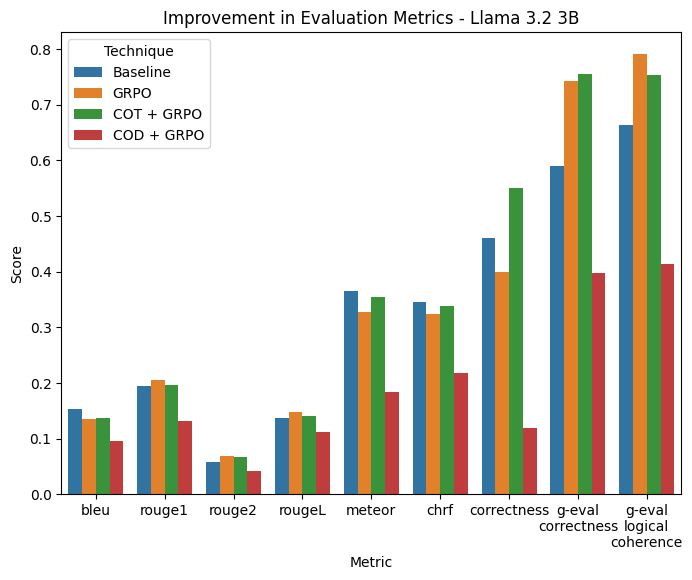

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.barplot(results, x="Metric", y="Score", hue="Technique", ax=ax)
_ = ax.set_title("Improvement in Evaluation Metrics - Llama 3.2 3B")

In [11]:
results.pivot(index="Metric", columns="Technique", values="Score")

Technique,Baseline,COD + GRPO,COT + GRPO,GRPO
Metric,,,,
bleu,0.153393,0.096334,0.136693,0.134550
chrf,0.345054,0.218545,0.337799,0.324029
correctness,0.460000,0.120000,0.550000,0.400000
g-eval\ncorrectness,0.589252,0.396738,0.754558,0.742012
g-eval\nlogical\ncoherence,0.663864,0.414094,0.753033,0.790428
meteor,0.365600,0.184333,0.355239,0.326962
rouge1,0.195220,0.132159,0.196140,0.205527
rouge2,0.058138,0.042731,0.067850,0.069246
rougeL,0.137201,0.111797,0.140737,0.148443


In [12]:
shot0_results["response_length"] = shot0_results["response"].str.split().str.len()
reasn_results["response_length"] = reasn_results["response"].str.split().str.len()
cot_reasn_results["response_length"] = cot_reasn_results["response"].str.split().str.len()
cod_reasn_results["response_length"] = cod_reasn_results["response"].str.split().str.len()

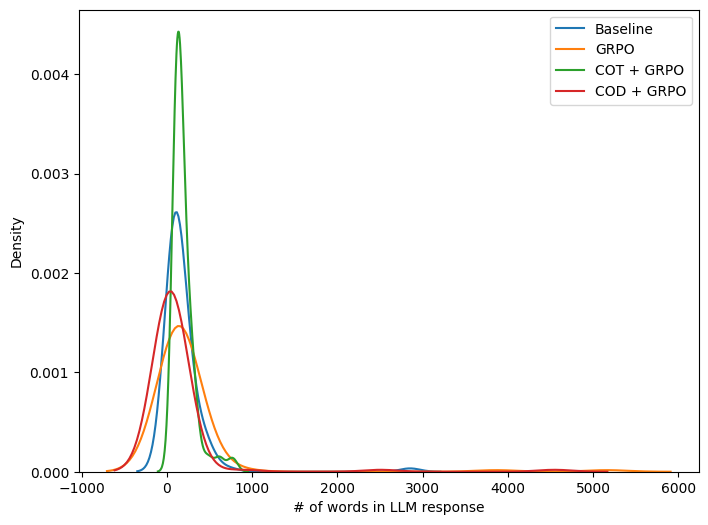

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.kdeplot(data=shot0_results, x="response_length", legend="brief", label="Baseline", ax=ax)
_ = sns.kdeplot(data=reasn_results, x="response_length", legend="brief", label="GRPO", ax=ax)
_ = sns.kdeplot(data=cot_reasn_results, x="response_length", legend="brief", label="COT + GRPO", ax=ax)
_ = sns.kdeplot(data=cod_reasn_results, x="response_length", legend="brief", label="COD + GRPO", ax=ax)
_ = ax.set_xlabel("# of words in LLM response")
_ = ax.legend()

In [14]:
shot0_results["response_length"].describe()

count     100.000000
mean      179.040000
std       298.512336
min         8.000000
25%        75.500000
50%       110.500000
75%       183.000000
max      2853.000000
Name: response_length, dtype: float64

In [15]:
reasn_results["response_length"].describe()

count     100.000000
mean      244.620000
std       629.945433
min        48.000000
25%        89.500000
50%       131.500000
75%       182.500000
max      5159.000000
Name: response_length, dtype: float64

In [16]:
cot_reasn_results["response_length"].describe()

count    100.000000
mean     193.950000
std      133.763275
min       53.000000
25%      111.250000
50%      159.000000
75%      227.750000
max      791.000000
Name: response_length, dtype: float64

In [17]:
cod_reasn_results["response_length"].describe()

count     100.000000
mean      122.190000
std       519.566811
min         6.000000
25%        11.000000
50%        25.000000
75%        58.750000
max      4549.000000
Name: response_length, dtype: float64

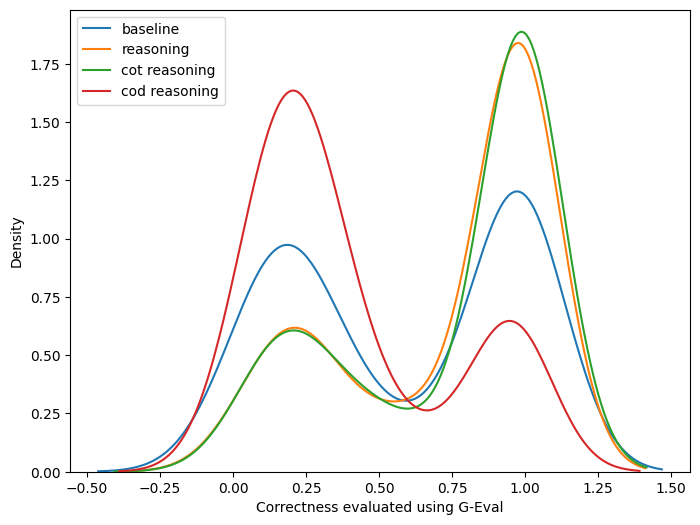

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.kdeplot(data=shot0_results, x="g-eval\ncorrectness", legend="brief", label="baseline", ax=ax)
_ = sns.kdeplot(data=reasn_results, x="g-eval\ncorrectness", legend="brief", label="reasoning", ax=ax)
_ = sns.kdeplot(data=cot_reasn_results, x="g-eval\ncorrectness", legend="brief", label="cot reasoning", ax=ax)
_ = sns.kdeplot(data=cod_reasn_results, x="g-eval\ncorrectness", legend="brief", label="cod reasoning", ax=ax)
_ = ax.set_xlabel("Correctness evaluated using G-Eval")
_ = ax.legend()

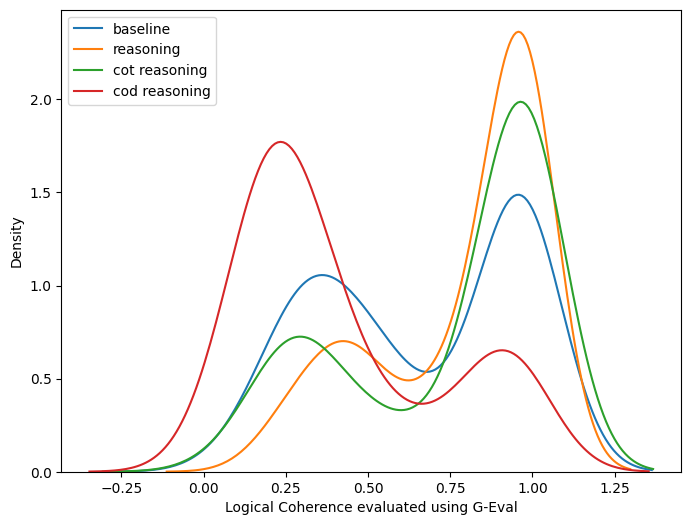

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.kdeplot(data=shot0_results, x="g-eval\nlogical\ncoherence", legend="brief", label="baseline", ax=ax)
_ = sns.kdeplot(data=reasn_results, x="g-eval\nlogical\ncoherence", legend="brief", label="reasoning", ax=ax)
_ = sns.kdeplot(data=cot_reasn_results, x="g-eval\nlogical\ncoherence", legend="brief", label="cot reasoning", ax=ax)
_ = sns.kdeplot(data=cod_reasn_results, x="g-eval\nlogical\ncoherence", legend="brief", label="cod reasoning", ax=ax)
_ = ax.set_xlabel("Logical Coherence evaluated using G-Eval")
_ = ax.legend()